Design RNN or its variant including LSTM or GRU a) Select a suitable time series
dataset. Example – predict sentiments based on product reviews b) Apply for prediction

In [5]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# 1. Load data
max_features = 10000  # Only top 10k words
maxlen = 200          # Cut reviews after 200 words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# 2. Preprocess data (padding to ensure equal length)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# 3. Define model
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# 4. Compile and train
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=32, epochs=3, validation_split=0.2)

# 5. Evaluate
score, acc = model.evaluate(x_test, y_test, batch_size=32)
print(f"Test Accuracy: {acc:.4f}")


Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 83ms/step - accuracy: 0.6930 - loss: 0.5583 - val_accuracy: 0.8176 - val_loss: 0.4047
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 94ms/step - accuracy: 0.8513 - loss: 0.3498 - val_accuracy: 0.8336 - val_loss: 0.3948
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 99ms/step - accuracy: 0.8759 - loss: 0.3000 - val_accuracy: 0.8492 - val_loss: 0.3767
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.8427 - loss: 0.3889
Test Accuracy: 0.8438


782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step


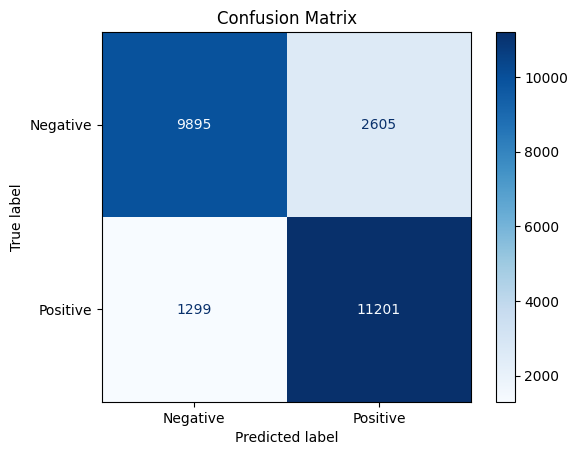

In [8]:
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype("int32")
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()